In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
arr = []

In [87]:
namef = pd.read_csv('dataset/monkey_labels.txt',index_col=False)

In [88]:
TDATADIR = 'dataset/training/training'
VDATADIR = 'dataset/validation/validation'

In [89]:
namef

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [90]:
Labels = namef['Label']
Labels = list(Labels)

CATEGORIES = []
for cat in Labels:
    cat = cat.strip()
    CATEGORIES.append(cat)
CATEGORIES

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

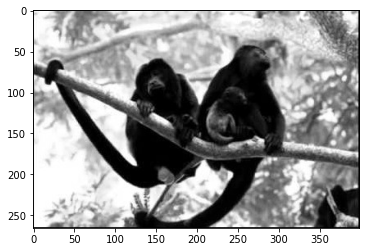

In [91]:
for category in CATEGORIES:
    path = os.path.join(TDATADIR ,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


In [92]:
print(img_array)
print(img_array.shape)

[[  0   2   3 ...   6   0   0]
 [ 13 236 248 ... 180  37   3]
 [ 15 238 227 ... 195  27   8]
 ...
 [ 17 246 252 ... 123   0   0]
 [ 17 240 252 ... 100   3   7]
 [  0   8   3 ...  10   0   0]]
(266, 399)


In [93]:
IMG_SIZE = 80

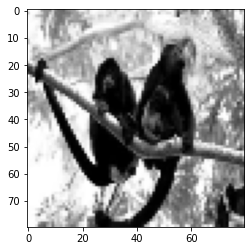

In [94]:
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [95]:
training_data = []
tlabels_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TDATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
                tlabels_data.append(category)
            except Exception as e:
                pass
create_training_data()     

In [96]:
print(len(training_data))

1098


In [97]:
validation_data = []
vlabels_data = []

def create_validation_data():
    for category in CATEGORIES:
        path = os.path.join(VDATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                validation_data.append([new_array, class_num])
                vlabels_data.append(category)
            except Exception as e:
                pass
create_validation_data()

In [98]:
print(len(validation_data))
print(len(vlabels_data))

272
272


In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [100]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [101]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 78, 78, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 78, 78, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 37, 37, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)       

In [102]:
import numpy as np
x = np.array(training_data)
y = np.array(tlabels_data)


In [103]:
history = model.fit(x,y,epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).